### Open Example HRRR-AK File 

Notebook contents 
* check out variables 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **xarray**

In [16]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [17]:
import rioxarray
import rasterio 

In [18]:
import cfgrib

In [19]:
pwd

'/home/cassie/python/repos/snow_model_forcing'

In [20]:
# EPSG:32608

In [21]:
# downloaded via download_hrrrak.sh script
filename = '/home/cassie/python/download_hrrr/hrrr.20250101/hrrr.t00z.wrfsfcf01.ak.grib2'

In [22]:
# ds = rioxarray.open_rasterio(filename)
# ds

In [23]:
# ds.rio.write_crs("EPSG:32608", inplace=True)
# ds.rio.crs

Opening with cfgrib first, 

In [24]:
ds = cfgrib.open_datasets(filename)
ds

[<xarray.Dataset> Size: 8kB
 Dimensions:     (y: 20, x: 21)
 Coordinates:
     time        datetime64[ns] 8B 2025-01-01
     step        timedelta64[ns] 8B 01:00:00
     atmosphere  float64 8B 0.0
     latitude    (y, x) float64 3kB ...
     longitude   (y, x) float64 3kB ...
     valid_time  datetime64[ns] 8B ...
 Dimensions without coordinates: y, x
 Data variables:
     tcc         (y, x) float32 2kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 8kB
 Dimensions:                  (y: 20, x: 21)
 Coordinates:
     time                     datetime64[ns] 8B 2025-01-01
     step                     timedelta64[ns] 8B 01:00:00
     boundaryLayerCloudLayer  float64 8B 0.0
     latitude                 (y, x) float64 3kB ...
     lo

Opening with xarray, 

In [25]:
ds = xr.open_dataset(filename, engine='cfgrib')

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'boundaryLayerCloudLayer'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}

In [26]:
ds_boundaryLayerCloudLayer = xr.open_dataset(filename, engine='cfgrib', filter_by_keys={'typeOfLevel': 'boundaryLayerCloudLayer'})
ds_boundaryLayerCloudLayer

<xarray.Dataset> Size: 8kB
Dimensions:                  (y: 20, x: 21)
Coordinates:
    time                     datetime64[ns] 8B ...
    step                     timedelta64[ns] 8B ...
    boundaryLayerCloudLayer  float64 8B ...
    latitude                 (y, x) float64 3kB ...
    longitude                (y, x) float64 3kB ...
    valid_time               datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    tcc                      (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

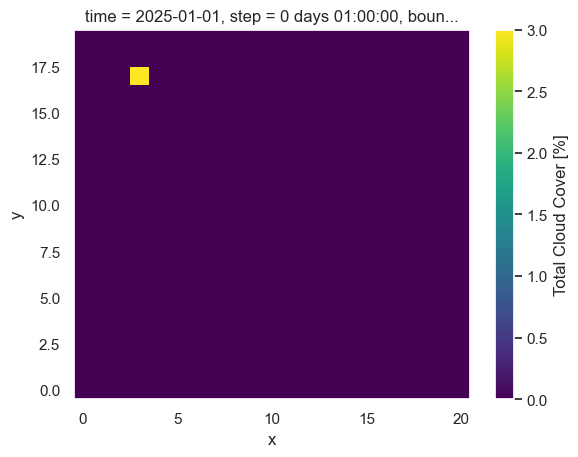

In [27]:
ds_boundaryLayerCloudLayer['tcc'].plot()

In [28]:
ds_atmosphere = xr.open_dataset(filename, engine='cfgrib', filter_by_keys={'typeOfLevel': 'atmosphere'})
ds_atmosphere

<xarray.Dataset> Size: 8kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    atmosphere  float64 8B ...
    latitude    (y, x) float64 3kB ...
    longitude   (y, x) float64 3kB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    tcc         (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

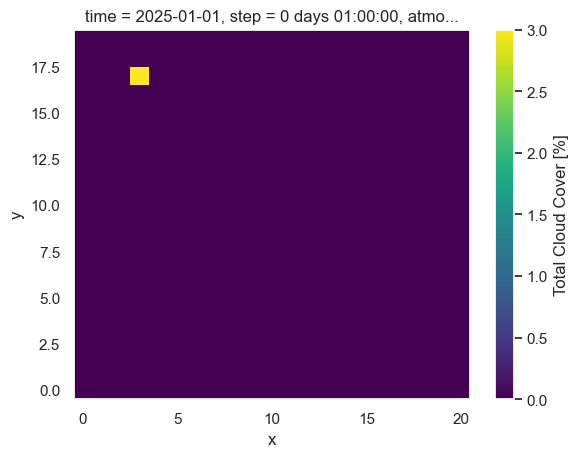

In [29]:
ds_atmosphere['tcc'].plot()

In [30]:
ds_height_above_ground = xr.open_dataset(filename, engine='cfgrib', filter_by_keys={'typeOfLevel': 'heightAboveGround'})
ds_height_above_ground

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(2.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/cassie/programs/miniforge3/envs/rasterio/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "

<xarray.Dataset> Size: 10kB
Dimensions:            (y: 20, x: 21)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
    latitude           (y, x) float64 3kB ...
    longitude          (y, x) float64 3kB ...
    valid_time         datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    t2m                (y, x) float32 2kB ...
    r2                 (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

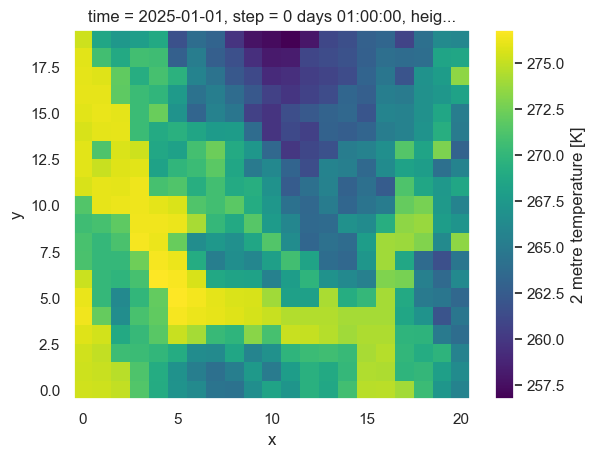

In [31]:
ds_height_above_ground['t2m'].plot()

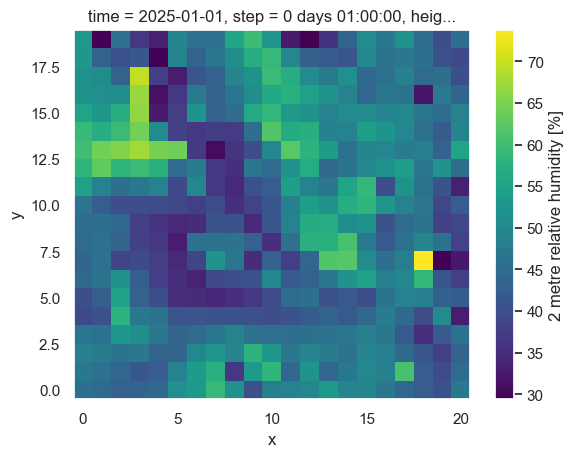

In [32]:
ds_height_above_ground['r2'].plot()

In [33]:
ds_surface = xr.open_dataset(filename, engine='cfgrib', filter_by_keys={'typeOfLevel': 'surface'})
ds_surface

<xarray.Dataset> Size: 12kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (y, x) float64 3kB ...
    longitude   (y, x) float64 3kB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    orog        (y, x) float32 2kB ...
    tp          (y, x) float32 2kB ...
    sdswrf      (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

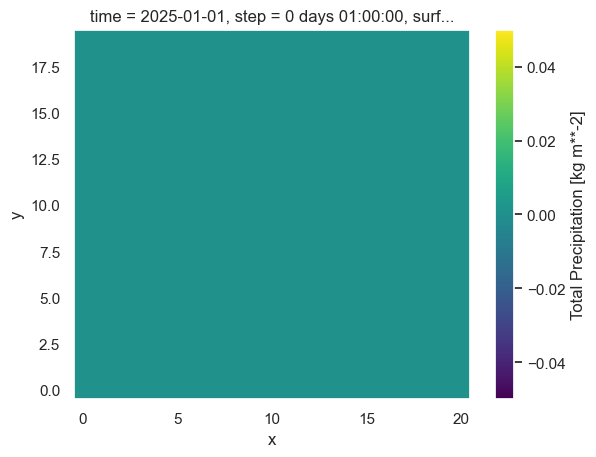

In [34]:
ds_surface['tp'].plot()

No precip, and the forecast is in the night so there is no shortwave radiation over the entire domain.

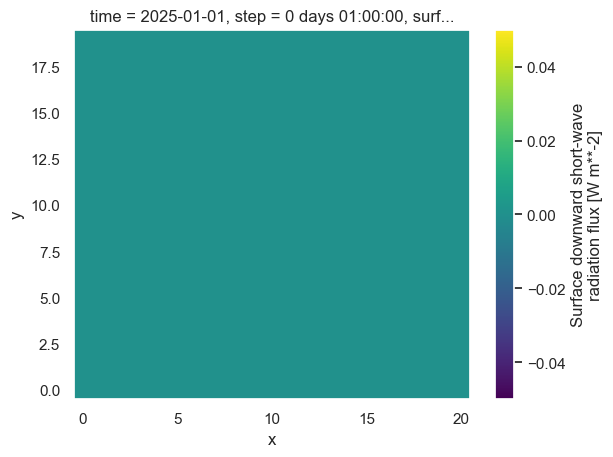

In [35]:
ds_surface['sdswrf'].plot()

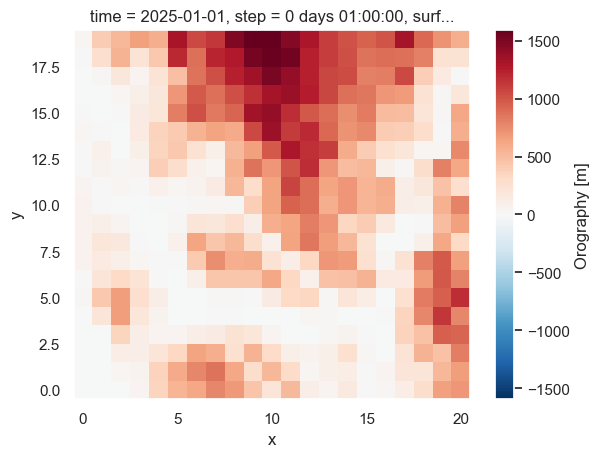

In [36]:
ds_surface['orog'].plot()

In [37]:
ds_surface

<xarray.Dataset> Size: 12kB
Dimensions:     (y: 20, x: 21)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (y, x) float64 3kB ...
    longitude   (y, x) float64 3kB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    orog        (y, x) float32 2kB ...
    tp          (y, x) float32 2kB ...
    sdswrf      (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [38]:
# check the crs of ds_surface
ds_surface.rio.crs

In [39]:
# reproject ds_surface to EPSG:32608
ds_surface = ds_surface.rio.write_crs("EPSG:32608", inplace=True)
ds_surface.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 8N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-135],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32608"]]')

In [40]:
ds_surface

<xarray.Dataset> Size: 12kB
Dimensions:      (y: 20, x: 21)
Coordinates:
    time         datetime64[ns] 8B ...
    step         timedelta64[ns] 8B ...
    surface      float64 8B ...
    latitude     (y, x) float64 3kB ...
    longitude    (y, x) float64 3kB ...
    valid_time   datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Dimensions without coordinates: y, x
Data variables:
    orog         (y, x) float32 2kB ...
    tp           (y, x) float32 2kB ...
    sdswrf       (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

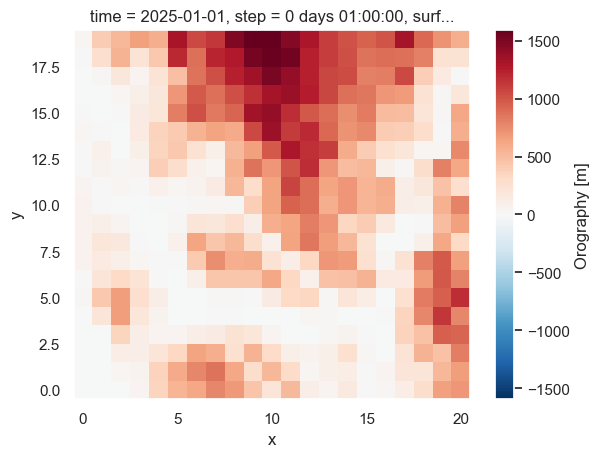

In [41]:
ds_surface['orog'].plot()

Try to open these, then merge them together 

In [42]:
# Merge all datasets together
ds_merged = xr.merge([ds_boundaryLayerCloudLayer, ds_atmosphere, ds_height_above_ground, ds_surface])
ds_merged

<xarray.Dataset> Size: 17kB
Dimensions:                  (y: 20, x: 21)
Coordinates:
    time                     datetime64[ns] 8B 2025-01-01
    step                     timedelta64[ns] 8B 01:00:00
    boundaryLayerCloudLayer  float64 8B ...
    latitude                 (y, x) float64 3kB 58.08 58.08 ... 58.59 58.59
    longitude                (y, x) float64 3kB 225.1 225.1 ... 226.0 226.1
    valid_time               datetime64[ns] 8B 2025-01-01T01:00:00
    atmosphere               float64 8B ...
    heightAboveGround        float64 8B ...
    surface                  float64 8B ...
    spatial_ref              int64 8B 0
Dimensions without coordinates: y, x
Data variables:
    tcc                      (y, x) float32 2kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    t2m                      (y, x) float32 2kB ...
    r2                       (y, x) float32 2kB ...
    orog                     (y, x) float32 2kB ...
    tp                       (y, x) float32 2kB ...
    sdswrf                   (y, x) float32 2kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-10T06:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# Powder Patch Lat/Lon
lat = 58.26200
lon = -134.51700
elevation = 2198 # feet 

# pull the grid cell for the exact location of Powder Patch Met Station 
ds_surface.sel(y=lat, x=lon, method='nearest')

ValueError: cannot supply selection options {'method': 'nearest', 'tolerance': None} for dimension 'y'that has no associated coordinate or index